# Composite Dual Momentum

### Assets: 
- U.S. Equities = SPY 
- International Equities = EFA : iShares MSCI EAFE ETF

- U.S. Corporate Bonds = LQD : iShares iBoxx Inv Grade Corporate Bond ETF
- U.S. High Yield Bonds = HYG : iShares iBoxx High Yield Corporate Bond ETF

- Equity RIETs = VNQ : Vanguard Real Estate Index Fund ETF
- Mortgage RIETs = REM : iShares Mortgage Real Estate ETF

- Stress = GLD : SPDR Gold Trus
- Stress = TLT : iShares 20 Plus Year Treasury Bond ETF

### Rules:
1. At the close on the last trading day of the month, calculate the 12-month return of each of the eight asset classes shown above, plus 3-month US Treasuries (BIL).
2. Divide the portfolio into four equally-sized modules (25% allocated to each). For each of the modules, determine the asset with the highest 12-month return (relative momentum). If that asset’s return exceeds the 12-month return of BIL (absolute momentum), go long that asset at the close, otherwise move to cash.
3. Hold positions until the final trading day of the following month. Rebalance the entire portfolio monthly, regardless of whether there is a change in position.

https://allocatesmartly.com/antonaccis-composite-dual-momentum/

*Note: Model does not have any transaction costs built in

In [1]:
# Importing all the necessary packages we will use for our code
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import yfinance as yf

# Allows entire DataFrame to be displayed when called
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#List used for indicator generation
#EASIER IF IN ALPHABETICAL ORDER
symbols = ['BIL', 'EFA', 'GLD', 'HYG', 'LQD', 'REM', 'SPY', 'TLT', 'VNQ']

#List used for rebalance criteria 
#EASIER IF IN ALPHABETICAL ORDER
assets = ['BIL', 'EFA', 'GLD', 'HYG', 'LQD', 'REM', 'SPY', 'TLT', 'VNQ']

start_date = '2000-01-01'
end_date = '2022-07-08'
interval = '1d'

price = yf.download(symbols, start=start_date, end=end_date, interval=interval)
price = price.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
price.columns = price.columns.droplevel(0)

#Renaming symbol columns to symbol_price (mandatory)
new_cols_list = ['BIL_Price', 'EFA_Price', 'GLD_Price', 'HYG_Price', 'LQD_Price', 
                 'REM_Price', 'SPY_Price', 'TLT_Price', 'VNQ_Price']
price.columns = new_cols_list

price = price.dropna()
price.head()

[*********************100%***********************]  9 of 9 completed


,BIL_Price,EFA_Price,GLD_Price,HYG_Price,LQD_Price,REM_Price,SPY_Price,TLT_Price,VNQ_Price
Date,,,,,,,,,
2007-05-30,83.685738,50.625893,64.720001,40.566498,59.261044,39.351414,113.685417,55.730282,41.811890
2007-05-31,83.685738,50.877045,65.540001,40.501366,59.210724,39.808609,113.566864,55.627228,41.643093
2007-06-01,83.704018,51.209831,66.440002,40.495956,58.983860,39.903210,114.129822,55.334984,41.701103
2007-06-04,83.722313,51.347965,66.540001,40.530640,59.079334,40.163338,114.144615,55.587135,41.869888
2007-06-05,83.722313,51.084255,66.370003,40.472847,58.888371,40.163338,113.692810,55.238014,41.205299


In [3]:
#Indicator and Signal 

#12 Month Return
for symbol in symbols:
    price[str(symbol) + '_ROC'] = (price[symbol + '_Price'].shift(1) / price[symbol + '_Price'].shift(253)) - 1

price = price.dropna()
price.head()

,BIL_Price,EFA_Price,GLD_Price,HYG_Price,LQD_Price,REM_Price,SPY_Price,TLT_Price,VNQ_Price,BIL_ROC,EFA_ROC,GLD_ROC,HYG_ROC,LQD_ROC,REM_ROC,SPY_ROC,TLT_ROC,VNQ_ROC
Date,,,,,,,,,,,,,,,,,,
2008-05-30,86.486092,49.395504,87.449997,40.537640,60.921749,22.162504,105.981987,60.939507,36.607246,0.033012,-0.029773,0.336681,-0.000813,0.023939,-0.434344,-0.070085,0.086326,-0.120380
2008-06-02,86.555992,48.880360,87.959999,40.202827,61.131058,22.127283,104.887039,61.174606,35.993713,0.033463,-0.029120,0.334300,0.000896,0.028897,-0.443274,-0.066788,0.095498,-0.120929
2008-06-03,86.555992,48.777325,86.879997,40.231903,61.368240,21.898348,104.275391,61.614937,36.231388,0.034072,-0.045489,0.323901,-0.007238,0.036403,-0.445476,-0.080985,0.105532,-0.136864
2008-06-04,86.537140,48.493992,86.650002,40.190365,61.178474,21.739859,104.222542,61.066170,36.419319,0.033846,-0.050063,0.305681,-0.007371,0.038743,-0.454768,-0.086462,0.108439,-0.134667
2008-06-05,86.480461,49.298916,86.449997,40.364826,60.852375,22.144886,106.306702,60.700325,37.253929,0.033621,-0.050706,0.305560,-0.006980,0.038889,-0.458714,-0.083297,0.105510,-0.116150


In [4]:
#Creating a dataframe of daily returns 
ret = price[['BIL_Price', 'EFA_Price', 'GLD_Price', 'HYG_Price', 'LQD_Price', 
             'REM_Price', 'SPY_Price', 'TLT_Price', 'VNQ_Price']].pct_change()
ret.columns = assets
ret = ret.dropna()
ret.head()

,BIL,EFA,GLD,HYG,LQD,REM,SPY,TLT,VNQ
Date,,,,,,,,,
2008-06-02,0.000808,-0.010429,0.005832,-0.008259,0.003436,-0.001589,-0.010331,0.003858,-0.016760
2008-06-03,0.000000,-0.002108,-0.012278,0.000723,0.003880,-0.010346,-0.005831,0.007198,0.006603
2008-06-04,-0.000218,-0.005809,-0.002647,-0.001032,-0.003092,-0.007237,-0.000507,-0.008906,0.005187
2008-06-05,-0.000655,0.016598,-0.002308,0.004341,-0.005330,0.018631,0.019997,-0.005991,0.022917
2008-06-06,0.000218,-0.028736,0.030191,-0.002779,0.004969,-0.029821,-0.031894,0.012947,-0.041840


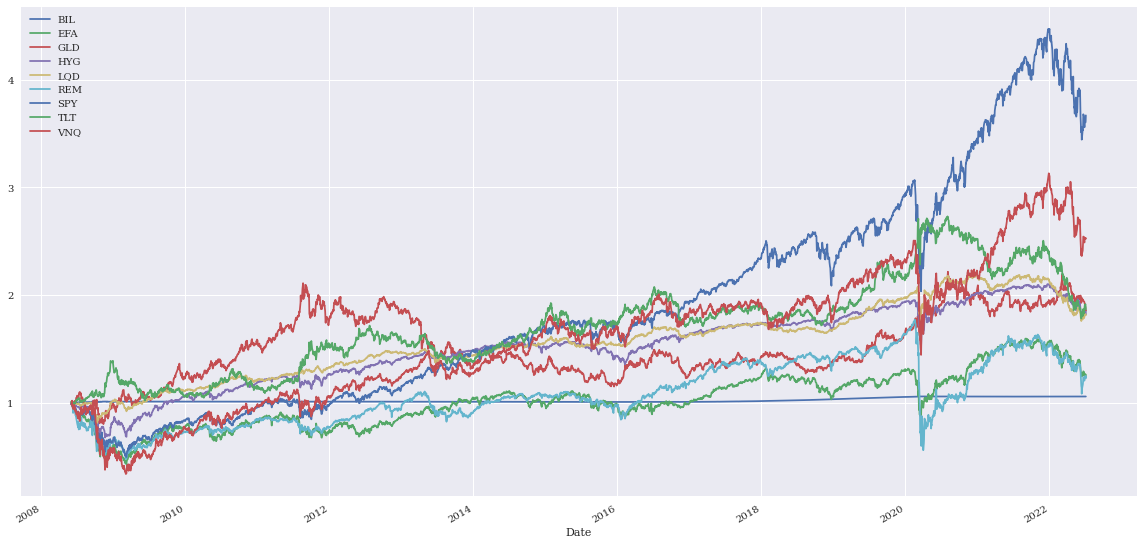

In [5]:
ret.add(1).cumprod().plot(figsize=(20,10))

In [6]:
#Getting rebalance dates 

#END OF MONTH

rebal = pd.DataFrame(index=price.index)
rebal['Rebal'] = price.index
rebal['Bool'] = np.where(rebal['Rebal'].dt.month == rebal['Rebal'].dt.month.shift(-1), False, True)
rebal = rebal[rebal.Bool == True]
rebal.head()

,Rebal,Bool
Date,,
2008-05-30,2008-05-30,True
2008-06-30,2008-06-30,True
2008-07-31,2008-07-31,True
2008-08-29,2008-08-29,True
2008-09-30,2008-09-30,True


In [7]:
def select_assets(rb_date):
    positions = []
    
    #Equities decision
    if price['SPY_ROC'][rb_date] > price['EFA_ROC'][rb_date]:
        if price['SPY_ROC'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('SPY')
        else:
            positions.append('BIL')
    elif price['SPY_ROC'][rb_date] < price['EFA_ROC'][rb_date]:
        if price['EFA_Price'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('EFA')
        else:
            positions.append('BIL')
            
    #Debt decision
    if price['LQD_ROC'][rb_date] > price['HYG_ROC'][rb_date]:
        if price['LQD_ROC'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('LQD')
        else:
            positions.append('BIL')
    elif price['LQD_ROC'][rb_date] < price['HYG_ROC'][rb_date]:
        if price['HYG_Price'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('HYG')
        else:
            positions.append('BIL')
            
    #Real Estate decision
    if price['VNQ_ROC'][rb_date] > price['REM_ROC'][rb_date]:
        if price['VNQ_ROC'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('VNQ')
        else:
            positions.append('BIL')
    elif price['VNQ_ROC'][rb_date] < price['REM_ROC'][rb_date]:
        if price['REM_Price'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('REM')
        else:
            positions.append('BIL')
            
    #Stress decision
    if price['GLD_ROC'][rb_date] > price['TLT_ROC'][rb_date]:
        if price['GLD_ROC'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('GLD')
        else:
            positions.append('BIL')
    elif price['GLD_ROC'][rb_date] < price['TLT_ROC'][rb_date]:
        if price['TLT_Price'][rb_date] > price['BIL_ROC'][rb_date]:
            positions.append('TLT')
        else:
            positions.append('BIL')
    
    print("Assets to go Long:\n", positions)
    return positions

def calc_returns(positions, rb_date, next_rb_date):
    print('Position Returns:\n', ret.loc[rb_date:next_rb_date,positions][1:].add(1).cumprod())
    return ret.loc[rb_date:next_rb_date,positions][1:].add(1).cumprod()

def rebalance(old_portfolio , weights):
    dollar_size = (weights * old_portfolio.sum())
    print('Dollar Weights:\n', dollar_size)
    return  dollar_size 

def calc_weights(positions, rb_date):
    weights = pd.Series(0.25, index=positions)
    print('Target Allocation by %:\n', weights)
    return weights

def update_portfolio_value(portfolio_value, future_values):
    return pd.concat([portfolio_value, future_values.sum(axis=1)])

def get_rebalance_dates(start_delay=0):
    t = pd.DataFrame({'date' : rebal.index[start_delay:]})
    rebal_dates = rebal.index[start_delay:]
    future_days = rebal.index[1:]
    return zip(rebal_dates, future_days)

In [8]:
rebalance_dates = get_rebalance_dates()

In [9]:
def calculate_portfolio_ret():
    #Store to daily total value of the portfolio
    portfolio_value = pd.Series()
    
    #Starting cash amount in portfolio
    current_positions = pd.Series(10000)          

    for rb, rb_next in rebalance_dates:          # rb = rebalance date
        
        print(' \n-Rebalance: ', rb)
        positions  = select_assets(rb)  
        weights       = calc_weights(positions, rb)                    
        new_positions = rebalance(current_positions, weights)        
        cum_ret       = calc_returns(positions, rb, rb_next)
        future_values = cum_ret * new_positions                 
        portfolio_value = update_portfolio_value(portfolio_value, future_values)
        current_positions = future_values.iloc[-1]               # For next round  
           
    portfolio_return = portfolio_value.pct_change().to_frame('Portfolio')
    
    #Daily portfolio returns
    return portfolio_return     

In [10]:
pr = calculate_portfolio_ret()
pr

 
-Rebalance:  2008-05-30 00:00:00
Assets to go Long:
 ['EFA', 'BIL', 'BIL', 'GLD']
Target Allocation by %:
 EFA    0.25
BIL    0.25
BIL    0.25
GLD    0.25
dtype: float64
Dollar Weights:
 EFA    2500.0
BIL    2500.0
BIL    2500.0
GLD    2500.0
dtype: float64
Position Returns:
                  EFA       BIL       BIL       GLD
Date                                              
2008-06-03  0.997892  1.000000  1.000000  0.987722
2008-06-04  0.992096  0.999782  0.999782  0.985107
2008-06-05  1.008563  0.999127  0.999127  0.982833
2008-06-06  0.979581  0.999346  0.999346  1.012506
2008-06-09  0.978264  0.999782  0.999782  1.000341
2008-06-10  0.961665  1.000437  1.000437  0.972601
2008-06-11  0.949414  1.001091  1.001091  0.989313
2008-06-12  0.946120  1.000437  1.000437  0.973170
2008-06-13  0.954815  1.001091  1.001091  0.975784
2008-06-16  0.959689  1.001091  1.001091  0.989200
2008-06-17  0.962587  1.000873  1.000873  0.991928
2008-06-18  0.954683  1.001309  1.001309  1.003638
2008-06

,Portfolio
2008-06-03,NaN
2008-06-04,-0.002220
2008-06-05,0.003240
2008-06-06,0.000282
2008-06-09,-0.003159
2008-06-10,-0.010816
2008-06-11,0.001466
2008-06-12,-0.005264
2008-06-13,0.003219
2008-06-16,0.004650


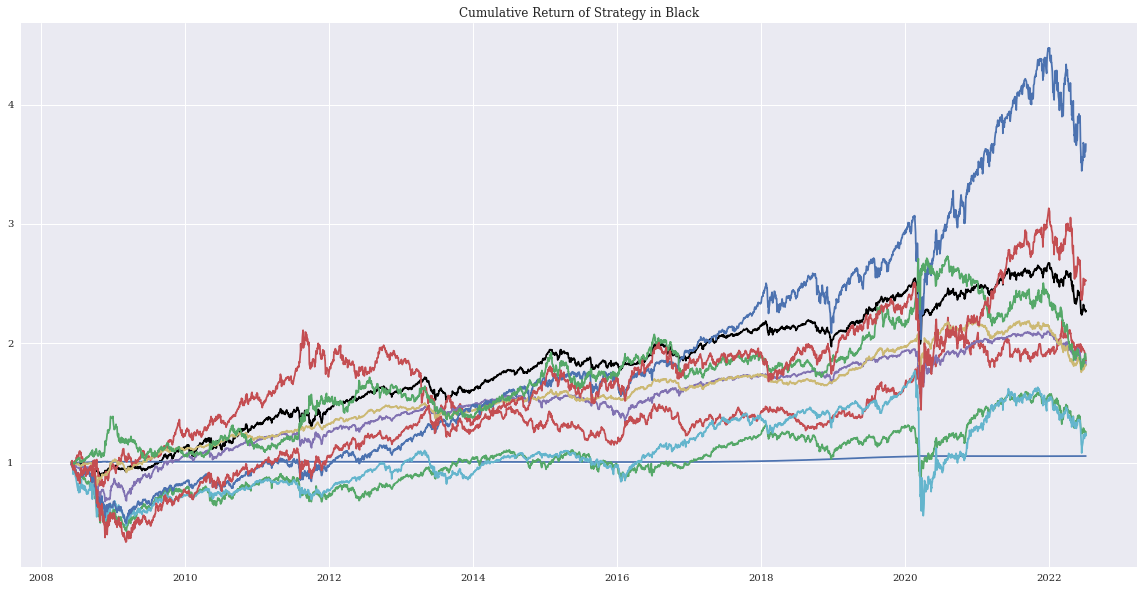

In [11]:
plt.figure(figsize=(20,10))
plt.plot(pr.add(1).cumprod(), color='black')
plt.plot(ret.add(1).cumprod())
plt.title("Cumulative Return of Strategy in Black");

In [12]:
#Performance Metrics

%matplotlib inline
import quantstats as qs

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2008-06-03  2008-06-03
End Period                 2022-07-07  2022-07-07
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          127.43%     273.04%
CAGR﹪                     6.0%        9.79%

Sharpe                     0.63        0.56
Smart Sharpe               0.62        0.55
Sortino                    0.86        0.78
Smart Sortino              0.84        0.76
Sortino/√2                 0.61        0.55
Smart Sortino/√2           0.6         0.54
Omega                      1.13        1.13

Max Drawdown               -21.61%     -50.7%
Longest DD Days            520         977
Volatility (ann.)          10.07%      20.66%
R^2                        0.38        0.38
Calmar                     0.28        0.19
Skew                       -0.91       -0.09
Kurtosis                   11.75       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-24,2020-03-19,2021-05-07,438,-21.606544,-17.089072
2,2022-01-03,2022-06-16,2022-07-07,185,-16.308202,-15.924642
3,2011-07-27,2011-10-03,2012-01-11,168,-11.333573,-10.105424
4,2013-05-03,2013-08-19,2014-04-16,348,-11.289841,-10.737867
5,2008-06-09,2008-10-27,2009-08-19,436,-11.068293,-9.930923


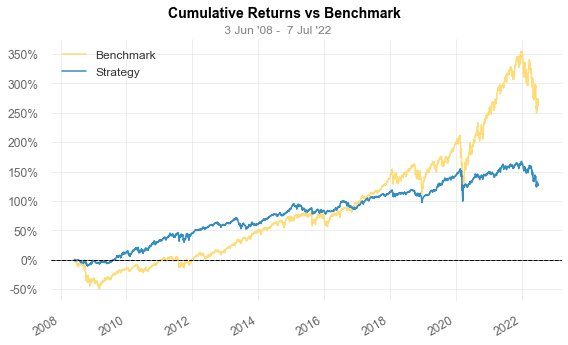

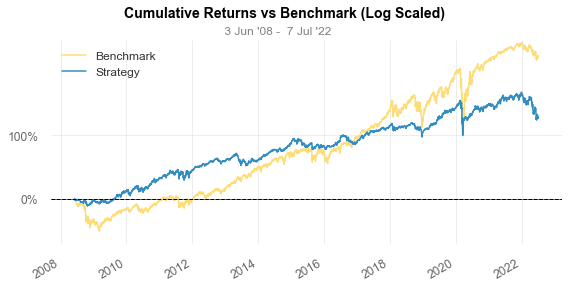

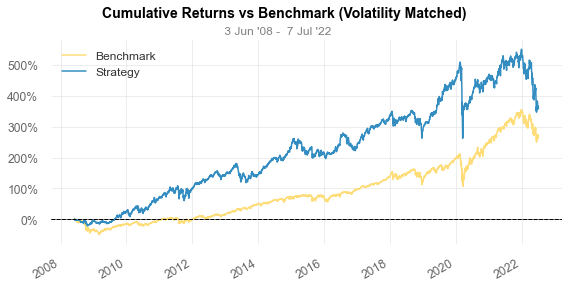

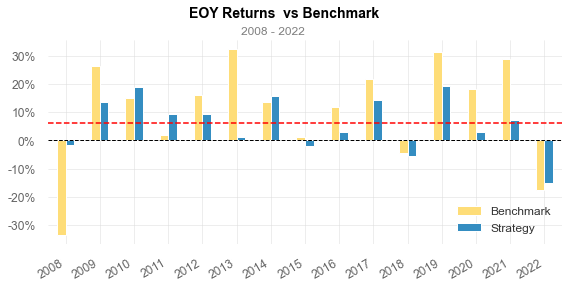

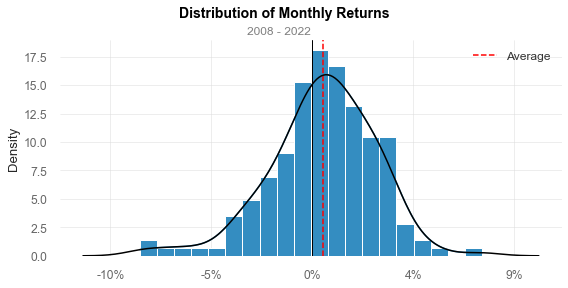

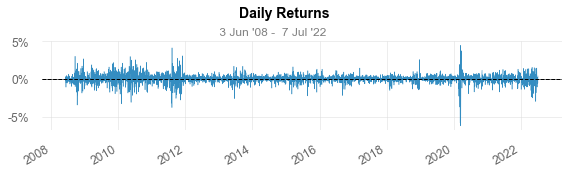

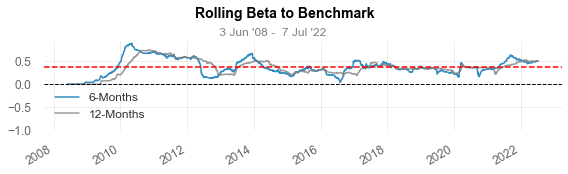

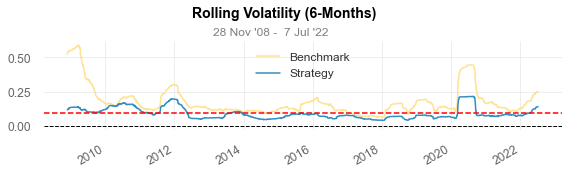

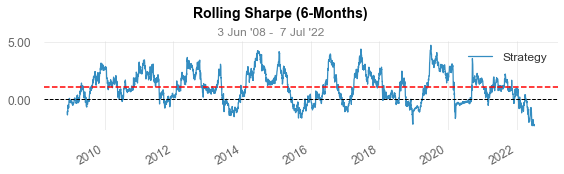

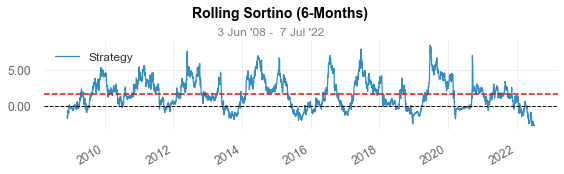

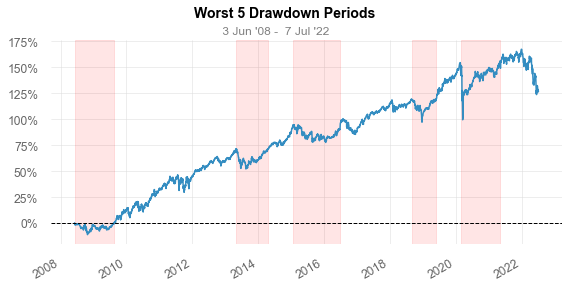

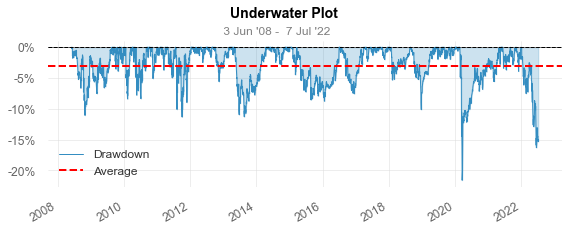

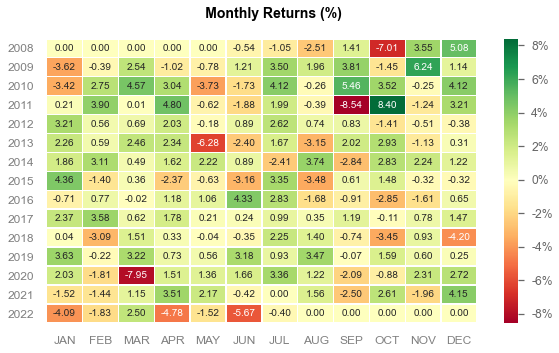

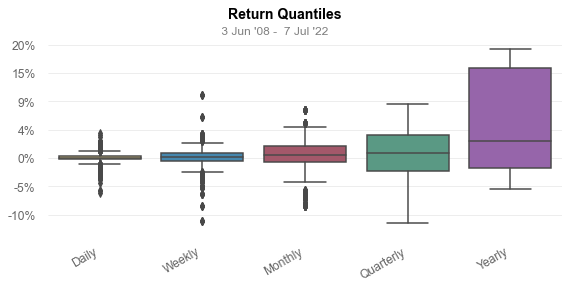

In [13]:
qs.reports.full(pr.Portfolio, "SPY")